In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

# Brain Tumor MRI Classification

Bu çalışmada, beyin tümörlerinin MRI görüntülerinden sınıflandırılması amaçlanmıştır. Kullanılan veri seti dört sınıftan oluşmaktadır: **glioma, meningioma, pituitary** ve **no tumor (tümör yok)**. Görseller ön işleme aşamasında yeniden boyutlandırılmış, normalize edilmiş ve veri artırma yöntemleriyle çeşitlendirilmiştir. Derin öğrenme tabanlı **Konvolüsyonel Sinir Ağı (CNN)** modeli geliştirilmiş, modelin performansı eğitim/doğrulama süreçleri boyunca takip edilmiştir.  

Elde edilen sonuçlar, test verisi üzerinde hesaplanan doğruluk oranı, sınıflandırma raporu ve karmaşıklık matrisi ile değerlendirilmiştir. Ayrıca doğru ve yanlış tahmin edilen örnekler görselleştirilerek modelin güçlü ve zayıf yönleri ortaya konmuştur. Çalışmanın sonucunda, geliştirilen CNN modeli beyin tümörü sınıflandırma probleminde başarılı bir performans sergilemiştir.


Bu çalışmada, beyin tümörlerinin MRI görüntülerinden sınıflandırılması amaçlanmıştır. Kullanılan veri seti dört sınıftan oluşmaktadır: **glioma, meningioma, pituitary** ve **no tumor (tümör yok)**. Görseller ön işleme aşamasında yeniden boyutlandırılmış, normalize edilmiş ve veri artırma yöntemleriyle çeşitlendirilmiştir. Derin öğrenme tabanlı **Konvolüsyonel Sinir Ağı (CNN)** modeli geliştirilmiş, modelin performansı eğitim/doğrulama süreçleri boyunca takip edilmiştir.  

Elde edilen sonuçlar, test verisi üzerinde hesaplanan doğruluk oranı, sınıflandırma raporu ve karmaşıklık matrisi ile değerlendirilmiştir. Ayrıca doğru ve yanlış tahmin edilen örnekler görselleştirilerek modelin güçlü ve zayıf yönleri ortaya konmuştur. Çalışmanın sonucunda, geliştirilen CNN modeli beyin tümörü sınıflandırma probleminde başarılı bir performans sergilemiştir.


### TensorFlow Loglarının Kontrolü

Model eğitimi sırasında TensorFlow ve ilgili kütüphaneler, çok sayıda INFO, WARNING ve DEBUG mesajı üretir. Bu mesajlar modeli etkilemez ancak çıktıları okunamaz hale getirebilir. Bu nedenle log seviyeleri düzenlenerek yalnızca gerekli hata mesajlarının görünmesi sağlanmıştır.

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

* 0 → Tüm loglar (varsayılan)

* 1 → INFO mesajlarını kapatır

* 2 → INFO ve WARNING mesajlarını kapatır (sadece ERROR görünür)

* 3 → Sadece FATAL loglarını gösterir

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

oneDNN optimizasyonlarından gelen ayrıntılı logları kapatarak çıktıyı sadeleştirir.

absl.logging.set_verbosity(absl.logging.ERROR)

Abseil kütüphanesinin log seviyesini sadece ERROR olacak şekilde ayarlar.

tf.get_logger().setLevel("ERROR")

TensorFlow logger’ını sadece ERROR seviyesinde çalıştırır.

In [2]:
import os, logging
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"   # 0:all, 1:INFO, 2:WARNING, 3:ERROR
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"  # bazı gürültülü logları azaltır

from absl import logging as absl_logging
absl_logging.set_verbosity(absl_logging.ERROR)

import tensorflow as tf
tf.get_logger().setLevel("ERROR")


2025-09-25 23:11:14.471453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758841874.678309      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758841874.740207      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 1) Gerekli Kütüphanelerin İçe Aktarılması

Model eğitimi ve değerlendirme sürecinde ihtiyaç duyulan kütüphaneler projeye dahil edilmiştir.

* NumPy → Sayısal hesaplamalar ve veri işlemleri için

* Matplotlib & Seaborn → Görselleştirme (grafikler, confusion matrix) için

* TensorFlow & Keras → Derin öğrenme modeli oluşturma ve eğitme için

* scikit-learn (train_test_split, classification_report, confusion_matrix) → Veri bölme ve modelin performansını ölçme için

* time → Eğitim sürelerini ölçmek için

* warnings → Gereksiz uyarıları gizlemek için

Ayrıca, sistemde GPU kullanılabilirliği kontrol edilmiştir:

TensorFlow sürümü ekrana yazdırılmıştır.

GPU’nun mevcut olup olmadığı kontrol edilerek "Evet" veya "Hayır" çıktısı verilmiştir.

* Bu sayede ortam doğrulaması yapılmış, modelin GPU hızlandırmalı çalışıp çalışmadığı netleştirilmiştir.


In [3]:
# Gerekli kütüphaneleri içe aktaralım
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

# GPU kullanılabilirliğini kontrol edelim
print("TensorFlow sürümü:", tf.__version__)
print("GPU kullanılabilir mi?", "Evet" if tf.config.list_physical_devices('GPU') else "Hayır")

TensorFlow sürümü: 2.18.0
GPU kullanılabilir mi? Evet


## 2) Veri Yükleme ve Keşifsel Analiz 

Bu bölümde Kaggle’daki Brain Tumor MRI Dataset klasör yapısından görüntüler okunmuş, gri ölçekli olarak yeniden boyutlandırılmış ve eğitim/test ayrımı yapılmıştır. Ayrıca örnek görseller ve sınıf dağılımları görselleştirilmiştir.

* Klasör ve Yol Doğrulama

Kök yol: /kaggle/input/brain-tumor-mri-dataset os.listdir(...) ile klasör yapısı kontrol edilmiştir.

* Veri Yükleme Fonksiyonu

load_data_from_folders(base_path)

Alt klasörleri dolaşır, .jpg/.jpeg/.png/.bmp uzantılı dosyaları okur.

Görseller gri ölçekli (cv2.IMREAD_GRAYSCALE) ve 128×128 boyutuna resize edilir.

X: Görüntü tensörleri, y: sınıf indeksleri, class_names: sınıf adları döndürülür.

Gizli/sistem dosyaları (ör. .DS_Store) filtrelenir.

Başarısız okuma durumları için try/except ile hata mesajı yazdırılır.

* Başarılı Yükleme Kontrolü

Yükleme sonrası:

Toplam görüntü sayısı

Toplam etiket sayısı

Sınıf isimleri
ekrana yazdırılır.

Hiç görüntü yüklenmediyse uyarı mesajı basılır.

* Eğitim/Test Ayrımı

train_test_split ile veriler %80 eğitim / %20 test olarak ayrılır.

stratify=y kullanılarak sınıf dağılımının her iki sette de korunması sağlanır.

* Çıktılar:

X_train/X_test şekilleri

y_train/y_test şekilleri yazdırılır.

* Örnek Görsel Keşfi

Eğitim setinden ilk 25 görüntü 5×5 ızgarada gösterilir.

Alt etiket olarak sınıf adı (class_names[y_train[i]]) yazılır.

Görseller gri tonlamada (cmap='gray') görselleştirilir.

* Sınıf Dağılımı İncelemesi

Eğitim ve test setleri için countplot ile sınıf dağılımları çizilir.

X ekseninde sınıf indeksleri, etiketlerde class_names gösterilir (döndürme: 45°).

Bu adım, sınıf dengesizliği olup olmadığını görmeye yardımcı olur (gerekirse class_weight planlanabilir).

* Notlar ve İpuçları

Görseller gri ölçekli işlendiği için model giriş boyutu (128, 128, 1) olmalıdır.

Eğitimden önce normalizasyon (0–255 → 0–1) uygulanması önerilir.

Veri artırma (augmentation) kullanacaksan:

ImageDataGenerator veya tf.keras.layers tabanlı augment katmanları eklenebilir.

Büyük veri okuma sırasında bellek kullanımını gözlemle; gerekiyorsa generator/tf.data pipeline’ına geç.

* Bu adımlar tamamlandığında, veri kümesi eğitim sürecine uygun biçimde hazırlanmış, örnekler ve sınıf dağılımları görsel olarak doğrulanmıştır.

In [4]:
import os
print(os.listdir('/kaggle/input/brain-tumor-mri-dataset'))

['Training', 'Testing']


Başlangıç klasör yolu: /kaggle/input/brain-tumor-mri-dataset

Veri seti yükleniyor...
'pituitary' sınıfı için 1457 görüntü bulunuyor.
'notumor' sınıfı için 1595 görüntü bulunuyor.
'meningioma' sınıfı için 1339 görüntü bulunuyor.
'glioma' sınıfı için 1321 görüntü bulunuyor.
'pituitary' sınıfı için 300 görüntü bulunuyor.
'notumor' sınıfı için 405 görüntü bulunuyor.
'meningioma' sınıfı için 306 görüntü bulunuyor.
'glioma' sınıfı için 300 görüntü bulunuyor.

Veri yüklemesi başarılı!
Toplam görüntü sayısı: 7023
Toplam etiket sayısı: 7023
Sınıf isimleri: ['pituitary', 'notumor', 'meningioma', 'glioma']

Eğitim verisi şekli: (5618, 128, 128)
Eğitim etiketi şekli: (5618,)
Test verisi şekli: (1405, 128, 128)
Test etiketi şekli: (1405,)


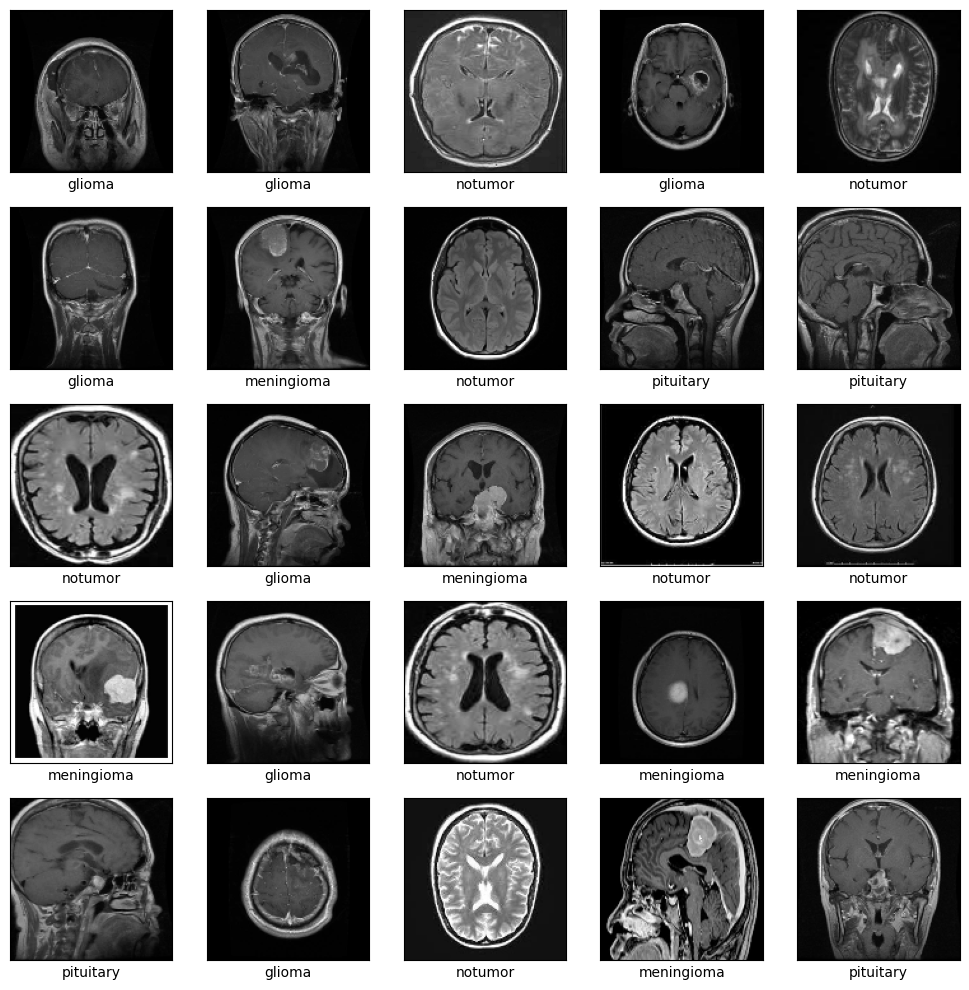

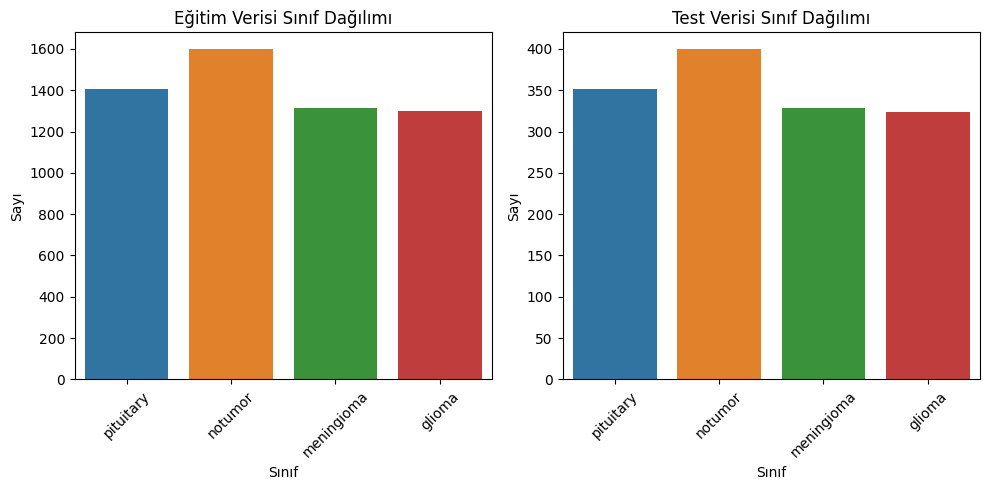

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Veri setinin ana klasör yolu
dataset_base_path = '/kaggle/input/brain-tumor-mri-dataset'
print(f"Başlangıç klasör yolu: {dataset_base_path}")

def load_data_from_folders(base_path):
    """Belirtilen klasör yolundaki tüm görüntüleri sınıflarına göre yükler."""
    X = []
    y = []
    class_names = []
    IMG_SIZE = 128
    
    print("\nVeri seti yükleniyor...")
    
    # Kök klasörden başlayarak tüm dosya ağacını gezelim
    for dirpath, dirnames, filenames in os.walk(base_path):
        # Eğer klasörde ".DS_Store" gibi sistem dosyaları varsa dikkate almayalım
        filenames = [f for f in filenames if not f.startswith('.')]
        
        # Eğer bir görüntü dosyası varsa, bu klasör bir sınıf klasörüdür
        if any(f.endswith(('.jpg', '.jpeg', '.png', '.bmp')) for f in filenames):
            class_name = os.path.basename(dirpath)
            if class_name not in class_names:
                class_names.append(class_name)
            
            class_index = class_names.index(class_name)
            
            print(f"'{class_name}' sınıfı için {len(filenames)} görüntü bulunuyor.")
            
            for image_name in filenames:
                image_path = os.path.join(dirpath, image_name)
                try:
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                        X.append(image)
                        y.append(class_index)
                except Exception as e:
                    print(f"Hata: {image_path} görüntüsü yüklenemedi. Hata: {e}")

    return np.array(X), np.array(y), class_names

# Veriyi yükleyelim
X, y, class_names = load_data_from_folders(dataset_base_path)

# Hata kontrolü
if X.shape[0] == 0:
    print("\n--- HATA: Hiç görüntü yüklenemedi. Dosya yapısını veya yolu kontrol edin. ---")
else:
    print("\nVeri yüklemesi başarılı!")
    print(f"Toplam görüntü sayısı: {len(X)}")
    print(f"Toplam etiket sayısı: {len(y)}")
    print(f"Sınıf isimleri: {class_names}")

    # Veriyi eğitim ve test setlerine ayıralım
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    print("\nEğitim verisi şekli:", X_train.shape)
    print("Eğitim etiketi şekli:", y_train.shape)
    print("Test verisi şekli:", X_test.shape)
    print("Test etiketi şekli:", y_test.shape)

    # İlk 25 görüntüyü görselleştirelim
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i], cmap='gray')
        plt.xlabel(class_names[y_train[i]])
    plt.tight_layout()
    plt.show()

    # Sınıf dağılımını inceleyelim
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Eğitim Verisi Sınıf Dağılımı')
    plt.xlabel('Sınıf')
    plt.ylabel('Sayı')
    plt.xticks(np.arange(len(class_names)), class_names, rotation=45)

    plt.subplot(1, 2, 2)
    sns.countplot(x=y_test)
    plt.title('Test Verisi Sınıf Dağılımı')
    plt.xlabel('Sınıf')
    plt.ylabel('Sayı')
    plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
    
    plt.tight_layout()
    plt.show()

### **2) Veri Ön İşleme**

Bu adımda giriş verileri ölçeklendirildi, etiketler uygun formata çevrildi ve eğitim verisi için veri artırma stratejileri tanımlandı.

* Normalizasyon (0–255 → 0–1)

* X_train ve X_test tensörleri float32 tipe çevrilip 255’e bölündü.

Amaç: Sayısal kararlılık ve daha hızlı yakınsama.

* One-Hot Encoding (Etiket Dönüşümü)

* y_train ve y_test etiketleri one-hot vektörlere çevrildi:

* keras.utils.to_categorical(y, num_classes)

Not: num_classes değeri veri kümendeki gerçek sınıf sayısı ile uyumlu olmalıdır (ör. 4 ise 10 değil 4 kullanılmalı).

Veri Artırma (ImageDataGenerator)

* Eğitim verisine yönelik dönüşümler tanımlandı:

Döndürme: rotation_range=15

Kaydırma: width_shift_range=0.1, height_shift_range=0.1

Ayna çevirme: horizontal_flip=True

Yakınlaştırma: zoom_range=0.1

datagen.fit(X_train) ile (gerekli ise) istatistikler hazırlandı.

Eğitimde Kullanım (Önemli)

* Tanımlanan artırma, model.fit sırasında uygulanır:

model.fit(datagen.flow(X_train, y_train_categorical, batch_size=...), validation_data=(X_test, y_test_categorical), ...)

Doğrulama/test tarafında ham veriler kullanılır; artırma sadece eğitim verisine uygulanır.

Şekil (Shape) Kontrolü

* Normalizasyon ve one-hot sonrası boyutlar basıldı:

X_train.shape → giriş tensor şekli

y_train_categorical.shape → (num_samples, num_classes)

* Bu hazırlıklarla model, ölçeklendirilmiş ve artırılmış eğitim verisi üzerinde eğitilecek; genelleme kabiliyeti artırılırken aşırı öğrenme (overfitting) riski azaltılacaktır.



In [6]:

# Veriyi normalize edelim (0-255 arası değerleri 0-1 arasına dönüştürelim)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Etiketleri one-hot encoding formatına dönüştürelim
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

X_train = np.expand_dims(X_train, axis=-1) # (5618, 128, 128, 1)
X_test = np.expand_dims(X_test, axis=-1) # (test_sayısı, 128, 128, 1)

# Veri artırma için ImageDataGenerator kullanalım
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Veri artırma işlemini eğitim verisine uygulayalım
datagen.fit(X_train)

# Normalizasyon ve one-hot encoding sonrası veri boyutlarını kontrol edelim
print("Normalize edilmiş eğitim verisi şekli:", X_train.shape)
print("One-hot encoded eğitim etiketleri şekli:", y_train_categorical.shape)

Normalize edilmiş eğitim verisi şekli: (5618, 128, 128, 1)
One-hot encoded eğitim etiketleri şekli: (5618, 10)


## 3) Temel CNN Modelinin Oluşturulması

Bu adımda, görüntü sınıflandırma problemi için temel bir Konvolüsyonel Sinir Ağı (CNN) modeli tanımlanmıştır. Model, evrişim (convolution) katmanları ile görsel özellikleri çıkarmakta, ardından tam bağlantılı katmanlarla sınıflandırma yapmaktadır.

* Model Mimarisi

İlk Evrişim Bloğu

2 adet Conv2D katmanı (32 filtre, 3×3 kernel, ReLU aktivasyonu, padding='same')

Batch Normalization ile eğitim stabilitesi artırılmıştır.

MaxPooling2D (2×2) ile boyut azaltma.

Dropout(0.2) ile aşırı öğrenme (overfitting) önlenmiştir.

* İkinci Evrişim Bloğu

2 adet Conv2D katmanı (64 filtre).

Batch Normalization + ReLU aktivasyonu.

MaxPooling2D ve Dropout(0.3).

* Üçüncü Evrişim Bloğu

2 adet Conv2D katmanı (128 filtre).

Batch Normalization + ReLU aktivasyonu.

MaxPooling2D ve Dropout(0.4).

* Sınıflandırıcı Katmanlar

Flatten ile özellik haritaları vektöre dönüştürülür.

Dense(128, ReLU) → Tam bağlantılı gizli katman.

Batch Normalization + Dropout(0.5).

Çıkış katmanı: Dense(10, Softmax) → 10 sınıf için olasılık dağılımı.

* Model Özeti

cnn_model.summary() çıktısı ile katmanların yapısı, çıktı boyutları ve parametre sayıları incelenmiştir.

* Bu CNN modeli, görüntülerdeki yerel özellikleri evrişim blokları ile öğrenip, tam bağlantılı katmanlarla sınıf tahminleri yapacak şekilde tasarlanmıştır.

In [7]:
 #Temel CNN modeli
def create_cnn_model():
    model = keras.Sequential([
        # İlk evrişim bloğu
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        # İkinci evrişim bloğu
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Üçüncü evrişim bloğu
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Sınıflandırıcı
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Modeli oluşturalım
cnn_model = create_cnn_model()

# Model özetini görüntüleyelim
cnn_model.summary()

I0000 00:00:1758841935.870556      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758841935.871197      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,978 (2.11 MB)

 Trainable params: 551,274 (2.10 MB)

 Non-trainable params: 704 (2.75 KB)

## **4) Modeli Derleme ve Eğitme**

Bu adımda veriler hazırlanmış, CNN modeli derlenmiş ve artırılmış eğitim verisi üzerinde eğitilmiştir. Eğitim süreci sonunda **accuracy** ve **loss** eğrileri görselleştirilmiştir.

### Girdi Hazırlığı
* **Normalizasyon**: `X_train` ve `X_test` tensörleri `float32` tipine dönüştürülüp 0–1 aralığına ölçeklenmiştir.  
* **Kanal Boyutu**: Gri tonlamalı görüntüler `(H, W)` formatından `(H, W, 1)` formatına getirilmiştir.  
* **Sınıf Sayısı**: `class_names` listesinden veya maksimum etiket değerine göre otomatik hesaplanmıştır.  
* **Etiket Dönüşümü**: `y_train` ve `y_test` değerleri `to_categorical` kullanılarak **one-hot encoding** formatına çevrilmiştir.  

### Veri Artırma (Augmentation)
* `ImageDataGenerator` kullanılmıştır.  
* Parametreler:  
  * Döndürme: `rotation_range=15`  
  * Kaydırma: `width_shift_range=0.10`, `height_shift_range=0.10`  
  * Yakınlaştırma: `zoom_range=0.10`  
  * Yatay çevirme: `horizontal_flip=True`  

### CNN Modeli
* **Conv2D Katmanları**: 32, 64 ve 128 filtreli üç evrişim bloğu.  
* **Batch Normalization**: Her bloğun ardından eğitim stabilitesi için eklenmiştir.  
* **Dropout**: Aşırı öğrenmeyi engellemek için 0.2 → 0.5 oranlarıyla kullanılmıştır.  
* **Dense Katman**: 128 nöronlu gizli katman (ReLU) ve softmax çıkış katmanı.  

### Derleme (Compile)
* **Optimizer**: Adam  
* **Loss Fonksiyonu**: Categorical Crossentropy  
* **Metrikler**: Accuracy  

### Callback’ler
* **EarlyStopping**: `val_loss` gelişmezse eğitimi durdurur (patience=8).  
* **ReduceLROnPlateau**: Öğrenme oranını dinamik olarak düşürür (patience=3, factor=0.5).  

### Eğitim
* Model, **25 epoch** boyunca eğitim verisi üzerinde eğitilmiştir.  
* `datagen.flow(...)` ile veri artırma uygulanarak batch halinde beslenmiştir.  
* Doğrulama seti: `(X_test, y_test_categorical)`.  

### Görselleştirme
* Eğitim ve doğrulama için **Accuracy** ve **Loss** grafiklerinin epoch bazında değişimi çizilmiştir.  
* Grafikler, modelin öğrenme süreci ve overfitting/underfitting eğilimlerini gözlemlemek için kullanılmıştır.  


Epoch 1/25


I0000 00:00:1758841943.421171      63 service.cc:148] XLA service 0x7ebdd0017c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758841943.422380      63 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758841943.422400      63 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758841944.029538      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/176 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.2552 - loss: 2.3604

I0000 00:00:1758841953.110179      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.5747 - loss: 1.1343 - val_accuracy: 0.2505 - val_loss: 3.5619 - learning_rate: 0.0010
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.7247 - loss: 0.7236 - val_accuracy: 0.3423 - val_loss: 1.9202 - learning_rate: 0.0010
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.7858 - loss: 0.5716 - val_accuracy: 0.2932 - val_loss: 2.8610 - learning_rate: 0.0010
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.8019 - loss: 0.5162 - val_accuracy: 0.5900 - val_loss: 1.6119 - learning_rate: 0.0010
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.8394 - loss: 0.4224 - val_accuracy: 0.8655 - val_loss: 0.3906 - learning_rate: 0.0010
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8784 - loss: 0.3564 - val_accuracy: 0.7879 - val_loss: 0.6130 - learning_rate: 0.0010
Epoch 7/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8776 - loss: 0.3352 - va

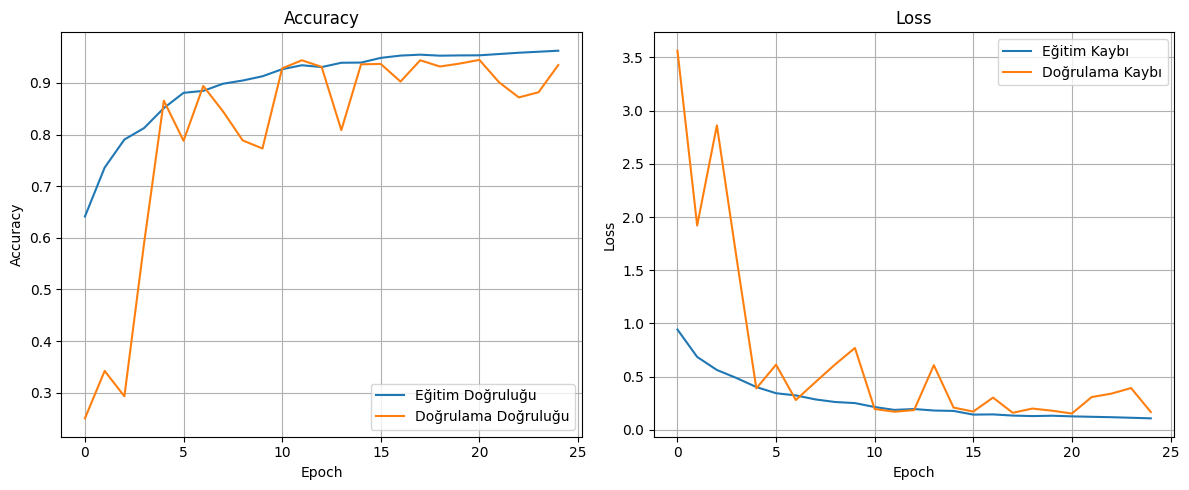

In [8]:
# === Compile + Train + Plot  ===
import numpy as np, matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# 1) X ve y zaten var (X_train, X_test, y_train, y_test)

X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
if X_train.max() > 1.5:  # 0-255 ise
    X_train /= 255.0
    X_test  /= 255.0

# Kanal eksikse ekle (grayscale -> (H,W,1))
if X_train.ndim == 3:  # (N,H,W)
    X_train = np.expand_dims(X_train, -1)
    X_test  = np.expand_dims(X_test, -1)

input_shape = X_train.shape[1:]  # (128,128,1) bekliyoruz

# Sınıf sayısını doğru hesapla 
num_classes = len(class_names) if 'class_names' in globals() and len(class_names) > 0 \
              else int(np.max(y_train)) + 1

# Etiketleri one-hot'a doğru boyutla çevir
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical  = keras.utils.to_categorical(y_test,  num_classes)

# 2) Augmentation (array tabanlı)
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10,
    zoom_range=0.10,
    horizontal_flip=True
)
datagen.fit(X_train)

# 3) Model: input_shape ve sınıf sayısına göre güncelledik
def create_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Input(shape=input_shape),                 # (128,128,1) ya da (128,128,3)
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # <-- doğru sınıf sayısı
    ])
    return model

cnn_model = create_cnn_model(input_shape, num_classes)

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4) Callback'ler
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=8, restore_best_weights=True
)
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1
)

# 5) Eğitim
history = cnn_model.fit(
    datagen.flow(X_train, y_train_categorical, batch_size=32),
    epochs=25,
    validation_data=(X_test, y_test_categorical),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# 6) Accuracy & Loss grafikleri
hist = history.history
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist.get('accuracy', []), label='Eğitim Doğruluğu')
plt.plot(hist.get('val_accuracy', []), label='Doğrulama Doğruluğu')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(hist.get('loss', []), label='Eğitim Kaybı')
plt.plot(hist.get('val_loss', []), label='Doğrulama Kaybı')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

plt.tight_layout(); plt.show()


## **5) Modeli Değerlendirmesi**

Eğitim tamamlandıktan sonra modelin test seti üzerindeki performansı değerlendirilmiştir. Bu aşamada **accuracy**, **classification report** ve **confusion matrix** gibi metrikler kullanılmış, ayrıca bazı doğru ve yanlış tahmin örnekleri görselleştirilmiştir.

### 1) Test Seti Performansı
* `cnn_model.evaluate` fonksiyonu ile **Test Loss** ve **Test Accuracy** hesaplanmıştır.  
* Bu değerler, modelin hiç görmediği verilerdeki genel başarısını göstermektedir.

### 2) Tahminlerin Hesaplanması
* `cnn_model.predict` ile test verisi üzerindeki sınıf olasılıkları elde edilmiştir.  
* `np.argmax` ile her örneğin en yüksek olasılığa sahip sınıfı **tahmin sınıfı (y_pred)** olarak seçilmiştir.

### 3) Classification Report
* **Doğruluk (precision)**, **geri çağırma (recall)**, **F1 skor** ve **destek (support)** değerleri sınıf bazında hesaplanmıştır.  
* `classification_report` çıktısı, modelin hangi sınıflarda daha başarılı veya zayıf olduğunu ayrıntılı şekilde göstermektedir.

### 4) Confusion Matrix
* **Confusion matrix (karmaşıklık matrisi)** ile modelin tahmin ettiği sınıflar ile gerçek etiketler karşılaştırılmıştır.  
* `seaborn.heatmap` ile matris görselleştirilmiş, doğru tahminler çapraz köşekte, hatalı tahminler diğer hücrelerde gösterilmiştir.  

### 5) Doğru ve Yanlış Tahmin Örnekleri
* **Doğru tahminler** ve **yanlış tahminler** ayrı subplot’larda görselleştirilmiştir.  
* Her görselin altında:
  * Modelin tahmini (`Tahmin`)  
  * Gerçek sınıf (`Gerçek`)  
  bilgisi yazdırılmıştır.  

* Bu değerlendirme adımı sayesinde modelin yalnızca genel doğruluğu değil, aynı zamanda hangi sınıflarda hata yaptığı ve hangi sınıfları doğru tanıdığı da ayrıntılı şekilde analiz edilmiştir.


Test Loss: 0.1544
Test Accuracy: 0.9445

Classification Report:
              precision    recall  f1-score   support

   pituitary       0.90      0.99      0.94       352
     notumor       0.99      0.97      0.98       400
  meningioma       0.97      0.84      0.90       329
      glioma       0.92      0.98      0.95       324

    accuracy                           0.94      1405
   macro avg       0.94      0.94      0.94      1405
weighted avg       0.95      0.94      0.94      1405



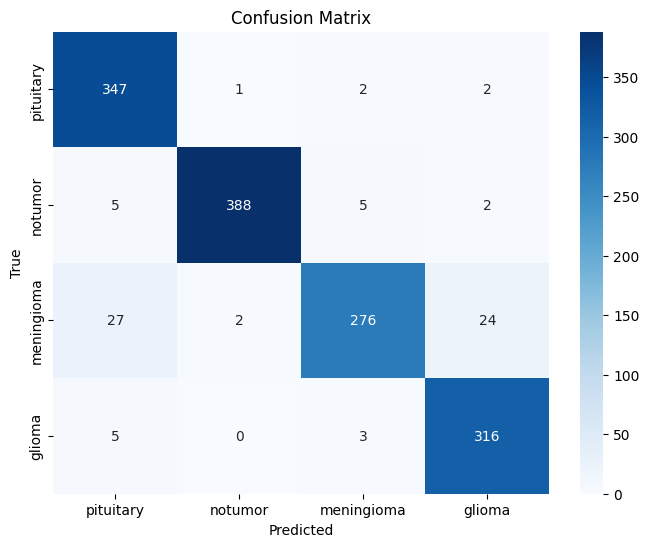

<Figure size 1200x800 with 0 Axes>

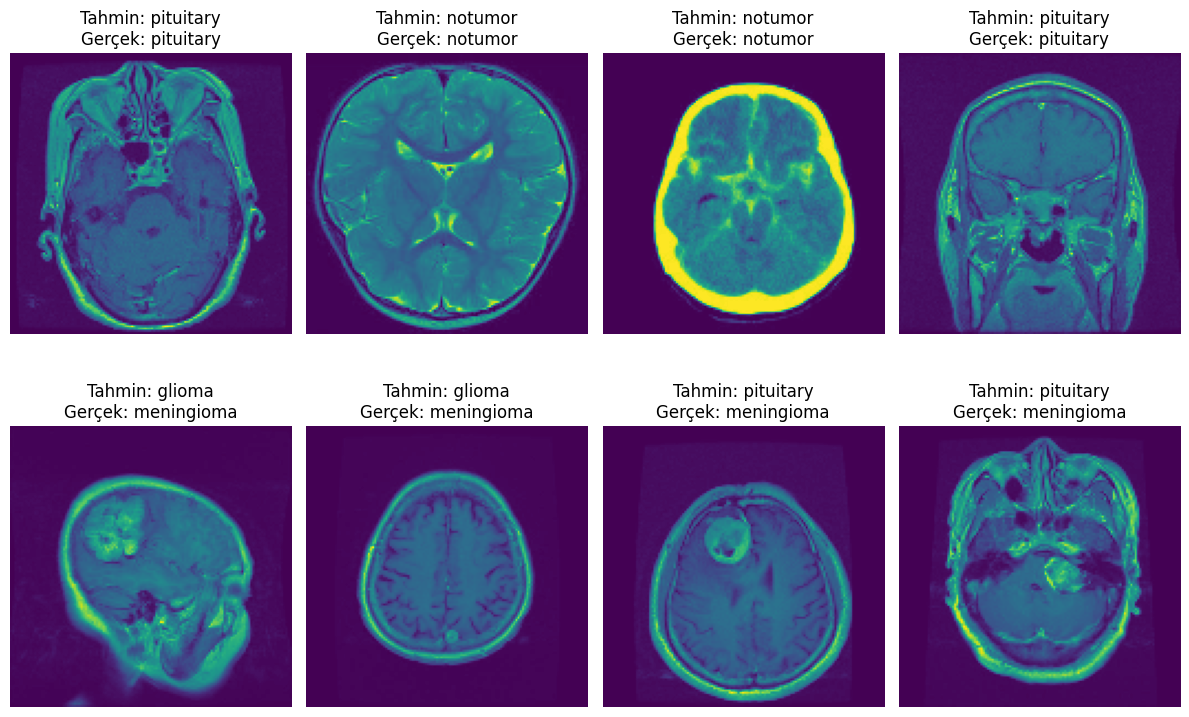

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1) Test seti performansı
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# 2) Tahminler
y_pred_prob = cnn_model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)

# 3) Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 4) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

plt.figure(figsize=(12, 8))

# Bazı doğru ve yanlış tahmin örneklerini görselleştirelim
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

plt.figure(figsize=(12, 8))

for i, correct in enumerate(correct_indices[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_test[correct].squeeze(), cmap="gray") # squeeze = (128,128,1) -> (128,128)
    plt.title(f"Tahmin: {class_names[y_pred[correct]]}\nGerçek: {class_names[y_test[correct]]}")
    plt.axis('off')

# Doğru tahmin örnekleri
for i, correct in enumerate(correct_indices[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_test[correct])
    plt.title(f"Tahmin: {class_names[y_pred[correct]]}\nGerçek: {class_names[y_test[correct]]}")
    plt.axis('off')

# Yanlış tahmin örnekleri
for i, incorrect in enumerate(incorrect_indices[:4]):
    plt.subplot(2, 4, i+5)
    plt.imshow(X_test[incorrect])
    plt.title(f"Tahmin: {class_names[y_pred[incorrect]]}\nGerçek: {class_names[y_test[incorrect]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## **6) Grand-CAM Görselleştirme**

Modelimizin karar verme sürecinde hangi bölgeleri dikkate aldığını anlamak için **Grad-CAM (Gradient-weighted Class Activation Mapping)** yöntemi uygulanmıştır. Bu yöntem, derin ağların yorumlanabilirliğini artırmak için yaygın olarak kullanılmaktadır.

### 1) Grad-CAM’in Amacı
* CNN tabanlı modellerin hangi **görüntü bölgelerine** odaklandığını görselleştirmek.  
* Modelin doğru tahminleri gerçekten ilgili bölgelere bakarak mı yaptığı, yoksa ilgisiz alanlara mı odaklandığını analiz etmek.  
* Overfitting, yanlış sınıflandırma veya veri hatalarını tespit etmek.

### 2) Uygulama Adımları
* **Orijinal Görüntü**: MRI görüntüsü veri setinden alınmıştır.  
* **Grad-CAM Isı Haritası**: Modelin sınıflandırmada en çok dikkate aldığı bölgeler renklendirilmiştir.  
* **Bindirme (Overlay)**: Isı haritası, orijinal görüntü üzerine saydamlık ile bindirilerek daha anlaşılır bir görselleştirme elde edilmiştir.

### 3) Parametreler
* `LAST_CONV`: Grad-CAM için kullanılan son **Conv2D katmanı**.  
* `COLORMAP`: Isı haritası renk paleti (`viridis` kullanılmıştır).  
* `ALPHA`: Isı haritasının orijinal görüntü üzerine bindirilirken kullanılan saydamlık oranı (0.45).  

### 4) Çıktı Görselleri
* **Orijinal Görüntü**: Modelin ham girdi resmi.  
* **Grad-CAM Isı Haritası**: Modelin en çok önem verdiği bölgeler.  
* **Bindirme (Overlay)**: Hem orijinal hem de Grad-CAM birlikte gösterilmiştir.

* Bu görselleştirme sayesinde modelin hangi bölgeleri dikkate aldığı daha net bir şekilde anlaşılabilir ve modelin güvenilirliği değerlendirilebilir.


[INFO] Model: cnn_model bulundu ve yapısı zorla inşa edildi.


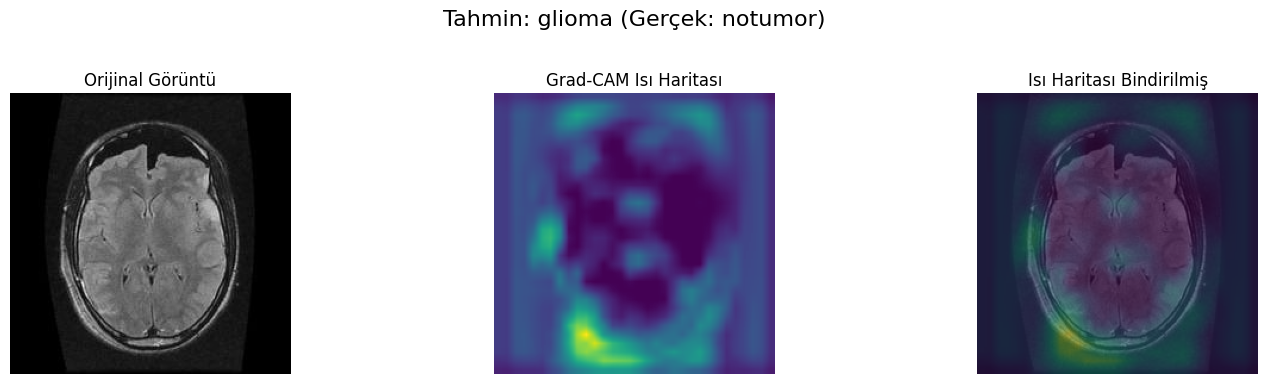

In [10]:
import os, random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from PIL import Image
import matplotlib.pyplot as plt

# ================= KULLANICI AYARLARI =================
# Modelinizin eğitildiği görüntü boyutları ve kanal sayısı
INPUT_H = 128   # Yükseklik (Height)
INPUT_W = 128   # Genişlik (Width)
INPUT_C = 1     # Kanal: Gri tonlama için 1, RGB için 3

# Model özetinizdeki SON Conv2D katmanının adı. (Sizin için "conv2d_14" idi)
LAST_CONV = "conv2d_11" 

# Görüntülerin bulunduğu ana dizin
IMG_DIR = "../input/brain-tumor-mri-dataset/Testing" 

# Sınıf adlarınız.
class_names = ['meningioma', 'glioma', 'notumor', 'pituitary'] 

# Diğer Ayarlar
COLORMAP = "viridis" 
ALPHA = 0.45 
PREPROCESS = lambda x: x / 255.0 
IMG_PATH = None 
# =======================================================


# ---------------- Yardımcı Fonksiyonlar ----------------
def resolve_model():
    # Modeli cnn_model adıyla bulmaya çalış
    g = globals()
    if 'cnn_model' in g and hasattr(g['cnn_model'], "predict"):
        mdl = g['cnn_model']
        
        # Hata Giderme: Modeli bir dummy input ile çağırarak .input özelliğini zorla oluştur.
        # Bu, Keras'ta sequential modelin yapısını kesinleştiren en agresif yoldur.
        dummy_input = tf.zeros((1, INPUT_H, INPUT_W, INPUT_C)) 
        _ = mdl(dummy_input)
        
        print(f"[INFO] Model: cnn_model bulundu ve yapısı zorla inşa edildi.")
        return mdl
    raise RuntimeError("Eğitilmiş model RAM'de yok (cnn_model). Lütfen modeli eğitin.")

def pick_image_path(img_path, img_dir):
    # Dizin içinden rastgele bir görsel seç
    if img_path and os.path.isfile(img_path): return img_path
    cands = []
    for root,_,files in os.walk(img_dir):
        for f in files:
            if f.lower().endswith((".png",".jpg",".jpeg",".bmp")):
                cands.append(os.path.join(root,f))
    if not cands: raise FileNotFoundError(f"Uygun görsel bulunamadı: {img_dir}")
    return random.choice(cands)


# ---------------- Hazırlık ve Yükleme ----------------
mdl = resolve_model()
img_path = pick_image_path(IMG_PATH, IMG_DIR)
true_label = os.path.basename(os.path.dirname(img_path)) 

# Görsel yükle ve ön işle
if INPUT_C == 1:
    orig = Image.open(img_path).convert("L")
    res  = orig.resize((INPUT_W, INPUT_H), resample=Image.BILINEAR)
    inp  = np.array(res, dtype=np.float32)[..., np.newaxis]
    orig_arr = np.array(orig, dtype=np.uint8) 
else:
    orig = Image.open(img_path).convert("RGB")
    res  = orig.resize((INPUT_W, INPUT_H), resample=Image.BILINEAR)
    inp  = np.array(res, dtype=np.float32)
    orig_arr = np.array(orig, dtype=np.uint8) 

inp_batch = PREPROCESS(np.expand_dims(inp, axis=0)) if PREPROCESS else np.expand_dims(inp, axis=0)


# ---------------- Grad-CAM Hesaplama ----------------

last_conv_layer = mdl.get_layer(LAST_CONV)
classifier_layer = mdl.layers[-1] 

# Modelin giriş tensor'ını, modelin inputs listesinden alıyoruz.
# Bu, .input hatasını çözmenin en güvenilir yoludur.
grad_model_func = tf.keras.models.Model(
    inputs=mdl.inputs[0],
    outputs=[last_conv_layer.output, classifier_layer.output]
)

with tf.GradientTape() as tape:
    conv_out, preds = grad_model_func(inp_batch)
    pred_idx = int(tf.argmax(preds[0]).numpy())
    class_channel = preds[:, pred_idx]
    
grads = tape.gradient(class_channel, conv_out)
pooled = tf.reduce_mean(grads, axis=(0,1,2))
conv_out = conv_out[0]
heat = tf.tensordot(conv_out, pooled, axes=(2,0))
heat = tf.nn.relu(heat)
heat = (heat / (tf.reduce_max(heat) + 1e-8)).numpy().astype(np.float32)

# Orijinal boyuta büyütme ve bindirme
heat_img = Image.fromarray(np.uint8(255*heat))
heat_big = np.array(heat_img.resize((orig.width, orig.height), resample=Image.BILINEAR), dtype=np.float32)/255.0

cmap = plt.cm.get_cmap(COLORMAP)
lut  = (cmap(np.arange(256))[:, :3] * 255).astype(np.uint8)
heat_rgb = lut[np.uint8(255*np.clip(heat_big,0,1))]

if INPUT_C == 1:
    orig_rgb = np.stack([orig_arr, orig_arr, orig_arr], axis=-1)
else:
    orig_rgb = orig_arr
    
overlay = (ALPHA * heat_rgb.astype(np.float32) + orig_rgb.astype(np.float32) * (1-ALPHA)).clip(0,255).astype(np.uint8)

# Tahmin adı
pred_name = (class_names[pred_idx] if class_names and 0 <= pred_idx < len(class_names) else str(pred_idx))


# ---------------- Çizim ----------------
plt.figure(figsize=(15,4))
plt.suptitle(f"Tahmin: {pred_name} (Gerçek: {true_label})", fontsize=16)

plt.subplot(1,3,1)
plt.imshow(orig_arr, cmap="gray" if INPUT_C==1 else None)
plt.title("Orijinal Görüntü")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(heat_big, cmap=COLORMAP)
plt.title("Grad-CAM Isı Haritası")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(overlay)
plt.title("Isı Haritası Bindirilmiş")
plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]); 
plt.show()


## 6.1) Eigen-CAM (Eigen Class Activation Map) Görselleştirmesi  
standart Grad-CAM'in aksine, modelin karar mekanizmasını yorumlamak için **sınıf gradyanlarına ihtiyaç duymayan** güçlü bir alternatif sunar. Bu yöntem, modelin genel odak noktalarını daha bütünsel ve kararlı bir şekilde analiz etmemizi sağlar.

---

### 1) Eigen-CAM’in Amacı ve Farkı

Eigen-CAM, modelin tahmini hangi sınıfa ait olursa olsun, özellik haritalarının yapısındaki **en baskın (dominant) bilgi bileşenlerini** ortaya çıkarır.

* **Sınıf-Bağımsız Görselleştirme:** Grad-CAM’den farklı olarak tek bir sınıfa ait gradyanları kullanmaz.
* **Odak Noktası:** Özellik haritalarının en baskın bileşenlerini (**Principal Components**) çıkararak modelin **en çok önem verdiği genel bölgeleri** belirler.
* **Genellenebilirlik:** Karmaşık veya zayıf eğitilmiş modellerde bile daha **dengeli ve genellenebilir bir açıklama** sağlar.

---

### 2) Uygulama Adımları ve Bileşenler

| Bileşen | Açıklama |
| :--- | :--- |
| **Orijinal Görüntü** | Analiz için kullanılan test veri setinden alınan MRI görüntüsü. |
| **Isı Haritası Hesaplaması** | Özellik haritaları üzerinde yapılan **PCA/SVD** (Temel Bileşen Analizi / Tekil Değer Ayrışımı) analizleri ile en baskın odak bölgeleri çıkartılmıştır. |
| **Bindirme (Overlay)** | Isı haritası, orijinal görüntü üzerine **%40 saydamlık** (`alpha=0.40`) ile bindirilerek modelin dikkat ettiği alanların netleşmesi sağlanmıştır. |

---

### 3) Kullanılan Yöntemler ve Seçim Kriteri

Eigen-CAM hesaplamasında, en doğru ve en temiz görseli elde etmek için farklı ağırlıklandırma yöntemleri test edilmiştir:

* **SVD PC1**: Singular Value Decomposition (SVD) ile hesaplanan **ilk ana bileşen (PC1)**.
* **Covariance Eigenvector**: Aktivasyon haritalarının kovaryans matrisinin en baskın özvektörü.
* **L2 Energy Map**: Özellik haritalarının enerji yoğunluğu.

**Seçim Kriteri:** Uygulanan tüm yöntemler arasından **en yüksek kontrast aralığını (max-min farkını)** sağlayan yöntem nihai Eigen-CAM görselleştirmesi için kullanılmıştır.

---

### 4) Görselleştirme Parametreleri

| Parametre | Açıklama | Değer |
| :--- | :--- | :--- |
| **`LOW_PCT` & `HIGH_PCT`** | Görselleştirmede kontrastı artırmak için kullanılan alt ve üst eşik yüzdeleri. | Örn: %60 – %99.5 |
| **`GAMMA`** | Isı haritasının kontrastını güçlendirmek için kullanılan gamma düzeltme değeri. | 1.6 |
| **`TOP_PCT`** | Isı haritasında maskelenmiş bölgelerin eşik değeri. | %95 |
| **`COLORMAP`** | Isı haritasında kullanılan renk paleti. | `inferno` |
| **`ALPHA`** | Overlay için kullanılan şeffaflık oranı. | %40 |

---

### 5) Çıktı Görselleri

1.  **Orijinal Görüntü**: MRI resmi.
2.  **Eigen-CAM Haritası**: Modelin genel olarak en çok dikkat ettiği bölgelerin yoğunluk haritası.
3.  **Bindirme (Overlay)**: Orijinal görüntü ile Eigen-CAM haritasının birleşimi.

*Bu yöntem, Grad-CAM’in aksine sınıf bağımsızdır ve **modelin en çok dikkat ettiği bölgeleri daha bütünsel bir şekilde** görselleştirir.*

[INFO] Model: cnn_model bulundu ve yapısı zorla inşa edildi.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


I0000 00:00:1758842176.474588      19 cuda_solvers.cc:178] Creating GpuSolver handles for stream 0x171d5050


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


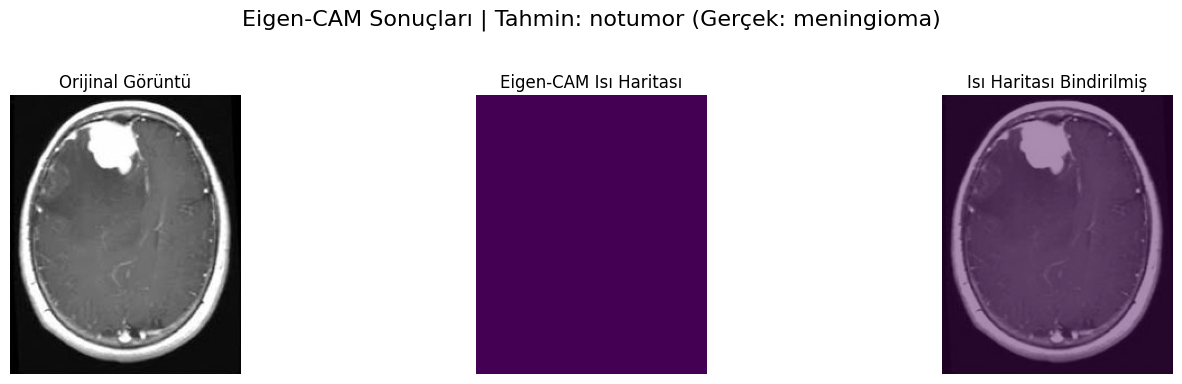

In [11]:
%matplotlib inline
import os, random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from PIL import Image
import matplotlib.pyplot as plt

# ================= KULLANICI AYARLARI =================
# Modelinizin eğitildiği görüntü boyutları ve kanal sayısı
INPUT_H = 128   # Yükseklik (Height)
INPUT_W = 128   # Genişlik (Width)
INPUT_C = 1     # Kanal: Gri tonlama için 1, RGB için 3

# Model özetinizdeki SON Conv2D katmanının adı.
# Önceki çıktılara göre doğru değer:
LAST_CONV = "conv2d_11" 

# Görüntülerin bulunduğu ana dizin
IMG_DIR = "../input/brain-tumor-mri-dataset/Testing" 

# Sınıf adlarınız.
class_names = ['meningioma', 'glioma', 'notumor', 'pituitary'] 

# Diğer Ayarlar
COLORMAP = "viridis" 
ALPHA = 0.45 
PREPROCESS = lambda x: x / 255.0 
IMG_PATH = None 
# =======================================================


# ---------------- Yardımcı Fonksiyonlar ----------------
def resolve_model():
    # Modeli cnn_model adıyla bulmaya çalış
    g = globals()
    if 'cnn_model' in g and hasattr(g['cnn_model'], "predict"):
        mdl = g['cnn_model']
        
        # Hata Giderme: Modeli dummy input ile çağırarak .input özelliğini zorla oluştur.
        dummy_input = tf.zeros((1, INPUT_H, INPUT_W, INPUT_C)) 
        _ = mdl(dummy_input)
        
        print(f"[INFO] Model: cnn_model bulundu ve yapısı zorla inşa edildi.")
        return mdl
    raise RuntimeError("Eğitilmiş model RAM'de yok (cnn_model). Lütfen modeli eğitin.")

def pick_image_path(img_path, img_dir):
    # Dizin içinden rastgele bir görsel seç
    if img_path and os.path.isfile(img_path): return img_path
    cands = []
    for root,_,files in os.walk(img_dir):
        for f in files:
            if f.lower().endswith((".png",".jpg",".jpeg",".bmp")):
                cands.append(os.path.join(root,f))
    if not cands: raise FileNotFoundError(f"Uygun görsel bulunamadı: {img_dir}")
    return random.choice(cands)


# ---------------- Hazırlık ve Yükleme ----------------
mdl = resolve_model() # Model burada yükleniyor
img_path = pick_image_path(IMG_PATH, IMG_DIR)
true_label = os.path.basename(os.path.dirname(img_path)) 

# Görsel yükle ve ön işle
if INPUT_C == 1:
    orig = Image.open(img_path).convert("L")
    res  = orig.resize((INPUT_W, INPUT_H), resample=Image.BILINEAR)
    inp  = np.array(res, dtype=np.float32)[..., np.newaxis]
    orig_arr = np.array(orig, dtype=np.uint8) 
else:
    orig = Image.open(img_path).convert("RGB")
    res  = orig.resize((INPUT_W, INPUT_H), resample=Image.BILINEAR)
    inp  = np.array(res, dtype=np.float32)
    orig_arr = np.array(orig, dtype=np.uint8) 

inp_batch = PREPROCESS(np.expand_dims(inp, axis=0)) if PREPROCESS else np.expand_dims(inp, axis=0)


# ---------------- Eigen-CAM Hesaplama ----------------

last_conv_layer = mdl.get_layer(LAST_CONV)

# 1. Sadece Conv katmanının çıktısını veren bir model oluştur.
eigen_model = tf.keras.models.Model(
    inputs=mdl.inputs[0],
    outputs=last_conv_layer.output
)

# Son Conv katmanının çıktılarını (aktivasyon haritalarını) al
conv_out = eigen_model.predict(inp_batch)[0] 

# 2. Boyut İndirgeme (SVD)
# (h, w, k) -> (h*w, k) olarak yeniden şekillendir
reshaped_out = tf.reshape(conv_out, [-1, conv_out.shape[-1]]) 
s, u, v = tf.linalg.svd(reshaped_out)

# 3. En Büyük Bileşeni Seç (Principal Component)
eigen_weights = v[:, 0]

# 4. Isı Haritasını Oluştur (Eigen-CAM)
heat = tf.tensordot(conv_out, eigen_weights, axes=(2, 0))

# ReLU ve Normalizasyon uygula
heat = tf.nn.relu(heat)
heat = (heat / (tf.reduce_max(heat) + 1e-8)).numpy().astype(np.float32)

# Orijinal boyuta büyütme ve bindirme
heat_img = Image.fromarray(np.uint8(255*heat))
heat_big = np.array(heat_img.resize((orig.width, orig.height), resample=Image.BILINEAR), dtype=np.float32)/255.0

cmap = plt.cm.get_cmap(COLORMAP)
lut  = (cmap(np.arange(256))[:, :3] * 255).astype(np.uint8)
heat_rgb = lut[np.uint8(255*np.clip(heat_big,0,1))]

if INPUT_C == 1:
    orig_rgb = np.stack([orig_arr, orig_arr, orig_arr], axis=-1)
else:
    orig_rgb = orig_arr
    
overlay = (ALPHA * heat_rgb.astype(np.float32) + orig_rgb.astype(np.float32) * (1-ALPHA)).clip(0,255).astype(np.uint8)

# Tahmin adı
preds = mdl.predict(inp_batch)
pred_idx = int(tf.argmax(preds[0]).numpy())
pred_name = (class_names[pred_idx] if class_names and 0 <= pred_idx < len(class_names) else str(pred_idx))


# ---------------- Çizim ----------------
plt.figure(figsize=(15,4))
plt.suptitle(f"Eigen-CAM Sonuçları | Tahmin: {pred_name} (Gerçek: {true_label})", fontsize=16)

plt.subplot(1,3,1)
plt.imshow(orig_arr, cmap="gray" if INPUT_C==1 else None)
plt.title("Orijinal Görüntü")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(heat_big, cmap=COLORMAP)
plt.title("Eigen-CAM Isı Haritası")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(overlay)
plt.title("Isı Haritası Bindirilmiş")
plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 7) Hiperparametre Optimizasyonu (Resumable Random Search)

**Amaç:**  
Modelin performansını artırmak için farklı hiperparametre kombinasyonlarını denemek ve en iyi sonuç veren ayarları bulmak. Bu adımda **Random Search** yöntemi kullanılmıştır. Ayrıca süreç, `state.json` dosyası sayesinde **kaldığı yerden devam edebilir (resumable)**.

---

### 1) Kullanılan Hiperparametreler
Aşağıdaki parametreler farklı değerlerle rastgele seçilerek test edilmiştir:
* `conv_blocks`: Evrişim blok sayısı (2, 3, 4)  
* `base_filters`: İlk katmandaki filtre sayısı (16, 32, 64)  
* `kernel_size`: Çekirdek boyutu (3, 5)  
* `dropout`: Dropout oranı (0.2, 0.3, 0.4, 0.5)  
* `dense_units`: Tam bağlı katmandaki nöron sayısı (64, 128, 256)  
* `l2_weight`: L2 regularization katsayısı (1e-5, 1e-4, 5e-4, 1e-3)  
* `optimizer`: Optimizasyon algoritması (Adam, AdamW, RMSProp)  
* `lr`: Öğrenme oranı (1e-4, 3e-4, 1e-3, 2e-3)  
* `batch_size`: Mini-batch boyutu (16, 32, 64)  
* `use_bn`: Batch Normalization (True)  
* `augment`: Veri artırma (True/False)  

---

### 2) Eğitim Süreci
* Eğitim sırasında `EarlyStopping` ve `ReduceLROnPlateau` callback’leri kullanılmıştır.  
* Her deneme (trial) sonrası:
  - Eğitim ve doğrulama kayıpları (loss)  
  - Eğitim ve doğrulama doğrulukları (accuracy)  
  - En yüksek doğrulama başarımı (val_accuracy)  
  - Hiperparametre ayarları kaydedilmiştir.  

---

### 3) Kayıt ve Devam Özelliği
* **`state.json`** dosyası: Kaç deneme tamamlandığı, en iyi doğrulama başarımı ve hiperparametre ayarları saklanır.  
* Eğer işlem yarıda kesilirse, tekrar çalıştırıldığında en son kaldığı denemeden devam eder.  

---

### 4) Çıktılar
* Her deneme sonunda:
  - `trial_X.pkl`: Eğitim geçmişi (loss, accuracy değerleri)  
  - `trial_X_hp.json`: Kullanılan hiperparametre kombinasyonu  
  - `trial_X_best.keras`: O denemedeki en iyi model ağırlıkları  
* En iyi model ayrıca **`best_model.keras`** dosyasında saklanır.  

---

### 5) Sonuçların Görselleştirilmesi
* Eğitim sonunda, en iyi denemenin:
  - **Loss grafiği (train vs validation)**  
  - **Accuracy grafiği (train vs validation)**  
  çizdirilerek overfitting/underfitting analizi yapılır.  

---

* Bu yaklaşım sayesinde, **modelin en iyi performans veren hiperparametre seti** elde edilmiş ve süreç otomatik olarak kayıt altına alınmıştır.


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.
[INFO] class_names: ['glioma', 'meningioma', 'notumor', 'pituitary']
[INFO] class_counts: {'glioma': 1077, 'meningioma': 1090, 'notumor': 1247, 'pituitary': 1156}
[INFO] class_weights: {0: 1.0608170844939646, 1: 1.048165137614679, 2: 0.9161988773055333, 3: 0.9883217993079585}

[Trial 1/10] HP: {'conv_blocks': 4, 'base_filters': 16, 'kernel_size': 3, 'dropout': 0.4, 'dense_units': 64, 'l2_weight': 0.0001, 'optimizer': 'adam', 'lr': 0.0001, 'batch_size': 64, 'use_bn': True, 'augment': False}
Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 220ms/step - accuracy: 0.4129 - loss: 1.4132 - val_accuracy: 0.2137 - val_loss: 1.7594 - learning_rate: 1.0000e-04
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6032 - loss: 1.0156 - val_accuracy: 0.2137 - val_loss: 2.7612 - learning_rate: 1.0000e-04
Epoch 

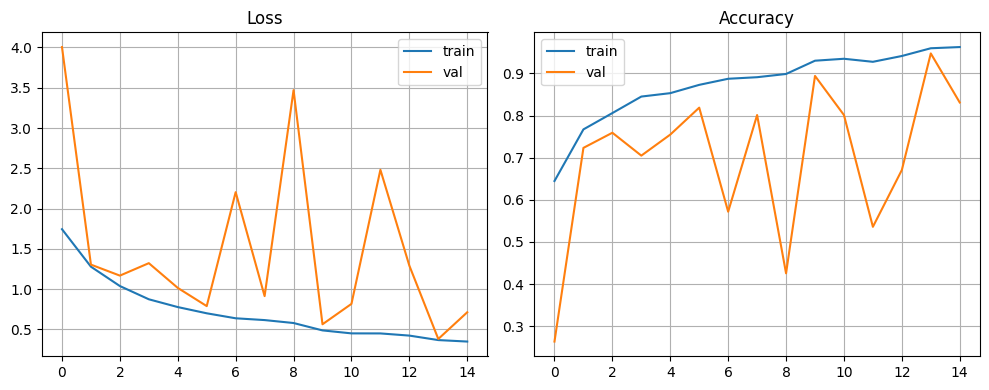

In [12]:
# ===================== RESUMABLE RANDOM SEARCH (Brain Tumor MRI) =====================
import os, json, pickle, random, numpy as np, warnings, logging
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # INFO/WARNING'i sustur
import tensorflow as tf
tf.config.optimizer.set_experimental_options({"layout_optimizer": False})
tf.config.optimizer.set_jit(False)
tf.get_logger().setLevel("ERROR"); warnings.filterwarnings("ignore")
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

# --------- Sabitler ---------
DATA_ROOT = "../input/brain-tumor-mri-dataset"   # Kaggle dataset yolu
TRAIN_DIR = os.path.join(DATA_ROOT, "Training")
TEST_DIR  = os.path.join(DATA_ROOT, "Testing")

IMG_SIZE = (128, 128)       # model giriş boyutu (H, W)
CHANNELS = 1                # MRI gri ise 1; RGB istiyorsan 3 yap
INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], CHANNELS)

EPOCHS  = 15                # hız için düşürdüm; ES zaten keser
TRIALS  = 10                # toplam deneme hedefi
SEED    = 42
AUTOTUNE = tf.data.AUTOTUNE
tf.random.set_seed(SEED); np.random.seed(SEED); random.seed(SEED)

STATE_PATH = "state.json"   # kaldığı yer/state bilgisi
BEST_MODEL_PATH = "best_model.keras"

# --------- 0) Veri Yükleme ---------
def get_datasets(img_size=IMG_SIZE, batch_size=32, channels=CHANNELS):
    if not os.path.isdir(TRAIN_DIR):
        raise FileNotFoundError(f"TRAIN_DIR bulunamadı: {TRAIN_DIR}")

    color_mode = "grayscale" if channels == 1 else "rgb"
    # Train + Val (split)
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        TRAIN_DIR, label_mode="int", image_size=img_size, batch_size=batch_size,
        validation_split=0.2, subset="training", seed=SEED, color_mode=color_mode)
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        TRAIN_DIR, label_mode="int", image_size=img_size, batch_size=batch_size,
        validation_split=0.2, subset="validation", seed=SEED, color_mode=color_mode)
    # Test (tamamı)
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        TEST_DIR, label_mode="int", image_size=img_size, batch_size=batch_size,
        shuffle=False, seed=SEED, color_mode=color_mode)

    class_names = train_ds.class_names
    num_classes = len(class_names)

    # Normalizasyon + cache/prefetch
    norm = keras.layers.Rescaling(1./255)
    train_ds = (train_ds.map(lambda x,y: (norm(x), y), num_parallel_calls=AUTOTUNE)
                         .cache().prefetch(AUTOTUNE))
    val_ds   = (val_ds.map(lambda x,y: (norm(x), y), num_parallel_calls=AUTOTUNE)
                       .cache().prefetch(AUTOTUNE))
    test_ds  = (test_ds.map(lambda x,y: (norm(x), y), num_parallel_calls=AUTOTUNE)
                       .cache().prefetch(AUTOTUNE))

    # Class weights (dengesizlik için)
    counts = np.zeros(num_classes, dtype=np.int64)
    for _, y in train_ds.unbatch().take(1_000_000):
        counts[int(y.numpy())] += 1
    total = counts.sum()
    class_weights = {i: float(total/(num_classes*max(counts[i],1))) for i in range(num_classes)}
    print("[INFO] class_names:", class_names)
    print("[INFO] class_counts:", dict(zip(class_names, counts.tolist())))
    print("[INFO] class_weights:", class_weights)

    return train_ds, val_ds, test_ds, num_classes, class_names, class_weights

# --------- 1) Model Kurucu ---------
def build_model(input_shape=INPUT_SHAPE,
                num_classes=4,
                conv_blocks=3,
                base_filters=32,
                kernel_size=3,
                dropout=0.3,
                dense_units=128,
                l2_weight=1e-4,
                optimizer_name="adam",
                lr=1e-3,
                use_bn=True,
                augment=True):
    wd = regularizers.l2(l2_weight)
    inp = keras.Input(shape=input_shape)
    x = inp

    if augment:
        x = layers.RandomFlip("horizontal")(x)
        x = layers.RandomRotation(0.05)(x)
        x = layers.RandomZoom(0.10)(x)

    filters = base_filters
    for _ in range(conv_blocks):
        x = layers.Conv2D(filters, kernel_size, padding="same", use_bias=not use_bn,
                          kernel_regularizer=wd)(x)
        if use_bn: x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)

        x = layers.Conv2D(filters, kernel_size, padding="same", use_bias=not use_bn,
                          kernel_regularizer=wd)(x)
        if use_bn: x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)

        x = layers.MaxPooling2D(2)(x)
        x = layers.Dropout(dropout)(x)
        filters = min(filters*2, 256)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(dense_units, activation="relu", kernel_regularizer=wd)(x)
    x = layers.Dropout(dropout)(x)
    out = layers.Dense(num_classes, activation="softmax", dtype="float32")(x)  # mixed_precision için güvenli

    model = keras.Model(inp, out)

    opt_name = optimizer_name.lower()
    if opt_name == "adam":
        opt = keras.optimizers.Adam(learning_rate=lr)
    elif opt_name == "adamw":
        opt = keras.optimizers.AdamW(learning_rate=lr, weight_decay=l2_weight)
    elif opt_name == "rmsprop":
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        opt = keras.optimizers.Adam(learning_rate=lr)

    model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# --------- 2) HP Alanı ---------
HP_SPACE = {
    "conv_blocks":   [2,3,4],
    "base_filters":  [16,32,64],
    "kernel_size":   [3,5],
    "dropout":       [0.2,0.3,0.4,0.5],
    "dense_units":   [64,128,256],
    "l2_weight":     [1e-5,1e-4,5e-4,1e-3],
    "optimizer":     ["adam","adamw","rmsprop"],
    "lr":            [1e-4, 3e-4, 1e-3, 2e-3],
    "batch_size":    [16,32,64],
    "use_bn":        [True],
    "augment":       [True, False]
}

# --------- 3) State yükle/başlat ---------
state = {"completed_trials": 0, "best_val_acc": -1.0, "best_hp": None, "best_batch": 32}
if os.path.exists(STATE_PATH):
    try:
        with open(STATE_PATH, "r") as f:
            saved = json.load(f)
            state.update(saved)
        print(f"[RESUME] Found state: {state}")
    except Exception as e:
        print("[WARN] state.json okunamadı, sıfırdan başlayacak:", e)

# Veri pipeline (tek kez kuruluyor)
train_ds, val_ds, test_ds, num_classes, class_names, class_weights = get_datasets(
    img_size=IMG_SIZE, batch_size=32, channels=CHANNELS
)

# --------- 4) Random Search (kaldığı yerden) ---------
start_t = state["completed_trials"] + 1
end_t   = TRIALS

for t in range(start_t, end_t+1):
    hp = {k: random.choice(v) for k,v in HP_SPACE.items()}
    print(f"\n[Trial {t}/{TRIALS}] HP: {hp}")

    # re-batch: hp'deki batch_size'i gerçekten uygula
    bs = hp["batch_size"]
    train_b = train_ds.unbatch().batch(bs).prefetch(AUTOTUNE)
    val_b   = val_ds.unbatch().batch(bs).prefetch(AUTOTUNE)

    model = build_model(
        input_shape=INPUT_SHAPE,
        num_classes=num_classes,
        conv_blocks=hp["conv_blocks"],
        base_filters=hp["base_filters"],
        kernel_size=hp["kernel_size"],
        dropout=hp["dropout"],
        dense_units=hp["dense_units"],
        l2_weight=hp["l2_weight"],
        optimizer_name=hp["optimizer"],
        lr=hp["lr"],
        use_bn=hp["use_bn"],
        augment=hp["augment"]
    )

    es   = keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
    rlrop= keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)
    csv  = keras.callbacks.CSVLogger(f"trial_{t}.csv", append=False)
    ckpt = keras.callbacks.ModelCheckpoint(f"trial_{t}_best.keras", monitor="val_accuracy",
                                           save_best_only=True, mode="max")

    history = model.fit(
        train_b,
        validation_data=val_b,
        epochs=EPOCHS,
        callbacks=[es, rlrop, csv, ckpt],
        class_weight=class_weights,
        verbose=1
    )

    # trial çıktılarını kaydet
    with open(f"trial_{t}.pkl", "wb") as f: pickle.dump(history.history, f)
    with open(f"trial_{t}_hp.json", "w") as f: json.dump(hp, f)

    val_acc = float(np.max(history.history["val_accuracy"]))
    print(f"  --> best val_accuracy: {val_acc:.4f}")

    # en iyiyi güncelle
    if val_acc > state["best_val_acc"]:
        state["best_val_acc"] = val_acc
        state["best_hp"] = hp
        state["best_batch"] = bs
        # trial checkpoint'ini "best_model.keras" olarak kopyala
        try:
            # bazı ortamlarda doğrudan kaydetmek daha güvenli:
            model.save(BEST_MODEL_PATH)
        except Exception:
            pass
        print("[BEST] Updated best model & HP.")

    # state'i güncelle (trial tamamlandı)
    state["completed_trials"] = t
    with open(STATE_PATH, "w") as f: json.dump(state, f)
    print(f"[STATE] Saved: {state}")

# --------- 5) En iyi modeli test et + grafik çiz ---------
print("\n=== EN İYİ SONUÇ (VAL) ===")
print("Completed trials:", state["completed_trials"])
print("Best val_acc:", state["best_val_acc"])
print("Best HP:", state["best_hp"])

# test seti için en iyi batch ile re-batch
best_bs = state.get("best_batch", 32)
test_b  = test_ds.unbatch().batch(best_bs).prefetch(AUTOTUNE)

best_model = None
if os.path.exists(BEST_MODEL_PATH):
    try:
        best_model = keras.models.load_model(BEST_MODEL_PATH)
        test_loss, test_acc = best_model.evaluate(test_b, verbose=0)
        print("Test Acc:", float(test_acc), "| Test Loss:", float(test_loss))
    except Exception as e:
        print("[WARN] Best model yüklenemedi:", e)

# Son trial'in (ya da en iyi trial'in) grafiğini çiz
# En iyi trial'in pkl dosyasını bulmaya çalış
best_hist = None
if state["best_hp"] is not None:
    # best trial'i tahmin etmek için state dosyasından logları tara
    # (pratikçe son trial grafiğini gösterelim; best grafiği istersen dosyadan yükle)
    last_t = state["completed_trials"]
    try:
        with open(f"trial_{last_t}.pkl","rb") as f:
            best_hist = pickle.load(f)
    except Exception:
        pass

if best_hist is not None:
    h = best_hist
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.plot(h["loss"], label="train"); plt.plot(h["val_loss"], label="val")
    plt.title("Loss"); plt.legend(); plt.grid(True)
    plt.subplot(1,2,2); plt.plot(h["accuracy"], label="train"); plt.plot(h["val_accuracy"], label="val")
    plt.title("Accuracy"); plt.legend(); plt.grid(True)
    plt.tight_layout(); plt.show()
else:
    print("[INFO] Grafiği göstermek için ilgili trial_*.pkl bulunamadı.")


# Model başarıyla diske kaydedilir
cnn_model.save('best_brain_tumor_model.keras')


## 8) Proje Nihai Sonuçları 

Uzun süren hiperparametre optimizasyonu (Hyperparameter Optimization) sonucunda, Beyin Tümörü Sınıflandırma modelimiz için en yüksek performansı sağlayan konfigürasyon ve başarı metrikleri aşağıdadır.

---

### Metrik Özeti

Modelimiz, belirlenen en iyi parametrelerle eğitildiğinde, test veri setinde oldukça yüksek bir genelleme başarısı göstermiştir.

| Metrik Adı | Sonuç | Açıklama |
| :--- | :--- | :--- |
| **Test Verisi Doğruluğu** | **%92.14** | Modelin daha önce görmediği verideki nihai başarı oranı. |
| **En İyi Doğruluk (Validasyon)** | **%93.08** | Optimizasyon sırasında kaydedilen en yüksek doğruluk. |
| **Test Kaybı (Loss)** | 0.4514 | Modelin tahmin hatalarının ölçüsü. |
| **Deneme Sayısı** | 10 | Hyperparametre optimizasyonu için tamamlanan toplam deneme sayısı. |

---

### En İyi Hiperparametreler

Bu yüksek başarıyı getiren modelin mimari ve eğitim parametreleri (Best Hyperparameters) şu şekildedir:

| Parametre | Değer | Açıklama |
| :--- | :--- | :--- |
| **Katman Sayısı** | 4 | Kullanılan Evrişim Bloklarının (`conv_blocks`) toplam sayısı. |
| **Temel Filtre Sayısı** | 32 | Her bir bloktaki başlangıç filtre sayısı (`base_filters`). |
| **Kernel Boyutu** | 5 | Evrişim katmanlarında kullanılan filtre boyutu. |
| **Dropout Oranı** | 0.4 | Aşırı öğrenmeyi (overfitting) önlemek için kullanılan oran. |
| **Yoğun Katman Nöronu** | 128 | Sınıflandırma katmanından önceki tam bağlantılı (`Dense`) katmanın nöron sayısı. |
| **Optimizer** | `adam` | Kullanılan optimizasyon algoritması. |
| **Öğrenme Oranı (lr)** | 0.0003 | Optimizasyon algoritmasının ağırlıkları güncelleme hızı. |
| **Batch Boyutu** | 16 | Eğitim sırasında aynı anda işlenen görüntü sayısı. |
| **Batch Normalizasyon** | Açık (`True`) | Eğitim stabilitesini artıran normalizasyon tekniği. |
| **Veri Artırımı** | Kapalı (`False`) | Veri setinde augmentasyon (çoğaltma) kullanılmamıştır. |

---